In [117]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [118]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [119]:
X_train.shape

(60000, 28, 28)

In [120]:
X_train,X_test = X_train/255.0 , X_test/255.0

In [121]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [122]:
y_train.shape

(60000,)

In [123]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu',activity_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(512,activation='relu',activity_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [124]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [125]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [126]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [127]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6025 - accuracy: 0.8067 - val_loss: 0.4725 - val_accuracy: 0.8462
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4842 - accuracy: 0.8410 - val_loss: 0.4427 - val_accuracy: 0.8557
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4534 - accuracy: 0.8507 - val_loss: 0.4336 - val_accuracy: 0.8507
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4443 - accuracy: 0.8526 - val_loss: 0.4583 - val_accuracy: 0.8483
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4284 - accuracy: 0.8571 - val_loss: 0.4044 - val_accuracy: 0.8672
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4238 - accuracy: 0.8622 - val_loss: 0.4099 - val_accuracy: 0.8652
Epoch 7/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4135 - accuracy: 0.8648 - val_loss: 0.3986 - val_accu

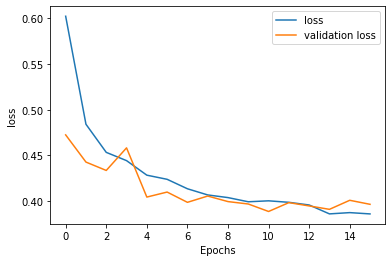

In [128]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


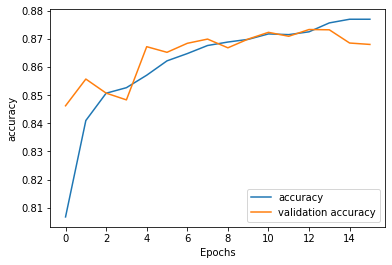

In [129]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## prediction

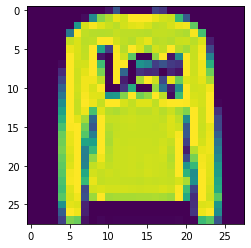

In [133]:
plt.imshow(X_test[1])


In [134]:
single_predict =X_test[1].reshape(1,28,28)
single_prediction = model.predict(single_predict)
predicted_class = np.argmax(single_prediction)

print(predicted_class)

2
